Primera parte. El objetivo de esta sección es deducir una fórmula para la solución óptima $\beta^\ast$
siguiendo los pasos a continuación:

a. Mostrar que el espacio columna de la matriz $X$ es un subespacio vectorial de $R^n$: $Col(X)$ = {b en $R^n$ tales que $b=X\beta$ con $\beta$ variando en $R^p$}

El espacio columna de una matriz $n_xp$ es un subespacio de $R^p$. $Col(X)\in R^n$ solo cuando las columnas de $X$ generan $R^n$. 
Cuando un sistema de ecuaciones lineales esta escrito de la forma $Ax=b$ el espacio columna de $A$ es el conjunto de todas las $b$ para las que el sistema tiene una solución.
En este caso tenemos $b=X\beta$ con $b$ en $R^n$. Por lo tanto $Col(X)\in R^n$.

b. Supongamos que cuando hablamos de vectores en $R^n$ nos referimos a vectores columna de $R^{nx1}$.
Mostrar en ese caso que el producto escalar entre dos vectores $u$, $v$ en $R^n$ puede calcularse como: $u\cdot v=v^Tu$ donde operación en el lado derecho de la igualdad es el producto de matrices usual.

c. Aplicando el teorema tomando como subespacio $S$ el subespacio del ítem (a), el punto $y$ de $R^n$ como el vector de la variable dependiente, y el vector $b$ como $b=X\beta^\ast$, convertir esta ecuación de optimalidad

$∥y − X\beta^\ast∥$ $=$ $min_{\beta\in R^p}∥y − X\beta∥$
en la condición de ortogonalidad que corresponde a la equivalencia 2 del teorema.

Sabemos por el teorema que $∥y − b∥$ $=$ $min_{s\in S}∥y − s∥$ es equivalente a $(y-b)\cdot s=0$ $\forall s \in S$.
Tomando $∥y − X\beta^\ast∥$ $=$ $min_{\beta\in R^p}∥y − X\beta∥$

Segunda parte. En esta sección la idea es realizar regresión lineal en $R^2$ y analizar como se comportan las soluciones obtenidas.
1.Usando los datos del archivo ejercicio_1.csv:
a. Graficar todos los puntos en el plano xy.

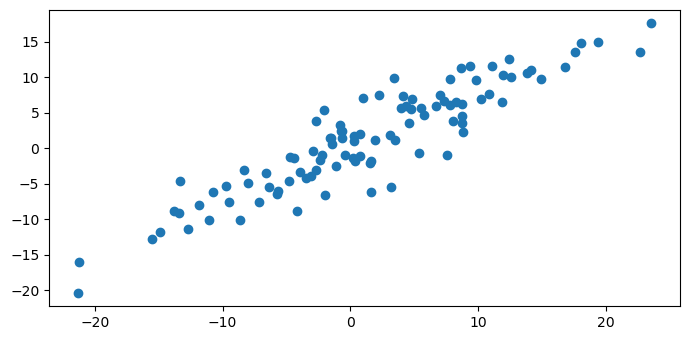

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
columns = ["X", "Y"]
df = pd.read_csv('ejercicio_1.csv', usecols=columns)
plt.plot(df.X, df.Y, "o")
plt.show()

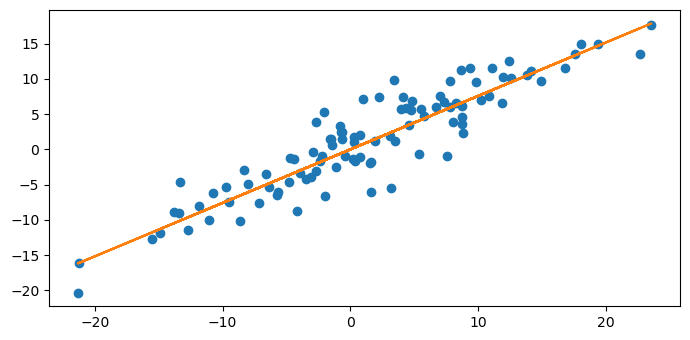

In [52]:
import numpy as np
from numpy.linalg import inv

data_x = df.X
Xt = np.array([data_x]) #crea un vector por lo tanto nos da la X transpuesta 

X = Xt.transpose() #generamos el X normal utilizando la propiedad de que la transpuesta de una transpuesta es ella misma

Xt_X = Xt@X
inv_XtX = inv(Xt_X)
invXtX_Xt = inv_XtX@Xt

data_y = df.Y
Yt = np.array([data_y])
Y = Yt.transpose()

beta_optimo = invXtX_Xt@Y #pendiente de la recta
beta_optimo = beta_optimo[0][0] #tengo un vector adentro de otro -> int

y=X*beta_optimo

plt.plot(df.X, df.Y, "o")
plt.plot(X, y)
plt.show()

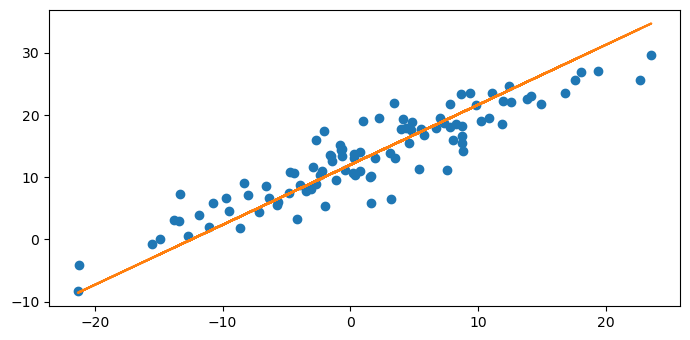

In [56]:
data_y = df.Y
Yt = np.array([data_y + 12])
Y = Yt.transpose()

beta_optimo = invXtX_Xt@Y 
beta_optimo = beta_optimo[0][0] 

y=X*beta_optimo

plt.plot(df.X, df.Y+12, "o")
plt.plot(X, y)
plt.show()

¿Es buena la aproximación realizada?, ¿cuál es el problema?
La aproximacion no es buena porque al graficar la recta sin tomar en cuenta una ordenada al origen (es decir en $y = ax + b$ tomamos $b = 0$), al aumentar los puntos en 12 unidades la ordenada al origen se mantiene constante cuando esta tambien deberia ser aumentada. Esto ocurre porque la recta de las y=b1x1 + b2x2 ... bpxp no incluye el valor b0 que corresponderia a la ordenada al origen.